*Review 2*

# Implementation

# Preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

In [3]:
df=pd.read_csv(r'city_day.csv')

In [4]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [5]:
# dataset-->For only city 'Delhi'

In [6]:
dataset=df[df['City']=='Delhi']

# Features
-->City    
-->Date   
-->PM2.5 (Particulate Matter 2.5-micrometer)              
-->PM10 (Particulate Matter 10-micrometer)              
-->SO2 (Sulphur Dioxide)            
-->NOx (Any Nitric x-oxide)       
-->NH3 (Ammonia)        
-->CO (Carbon Monoxide)        
-->O3 (Ozone or Trioxygen)        
-->Benzene         
-->Toluene      
-->Xylene     
-->AQI           
-->AQI_Bucket    

In [7]:
print(dataset.shape) # 48192 rows. 16 columns

(2009, 16)


<Axes: >

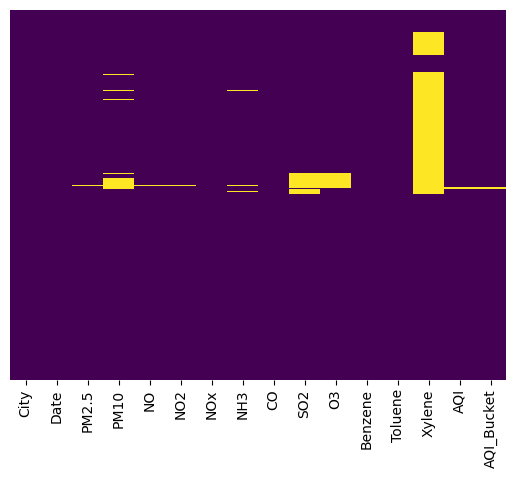

In [8]:
import seaborn as sns
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

yellow null values

In [9]:
dataset.isnull().sum(axis = 0)  # axis=1 gives no.of null values in every row. axis=0 implies column

City            0
Date            0
PM2.5           2
PM10           77
NO              2
NO2             2
NOx             0
NH3             9
CO              0
SO2           110
O3             84
Benzene         0
Toluene         0
Xylene        781
AQI            10
AQI_Bucket     10
dtype: int64

In [10]:
# Replacing null values with some values

dataset['PM2.5']=dataset['PM2.5'].fillna(dataset['PM2.5'].mean())
dataset['PM10']=dataset['PM10'].fillna(dataset['PM10'].mean())
dataset['NO']=dataset['NO'].fillna(dataset['NO'].mean())
dataset['NO2']=dataset['NO2'].fillna(dataset['NO2'].mean())
dataset['NOx']=dataset['NOx'].fillna(dataset['NOx'].mean())
dataset['NH3']=dataset['NH3'].fillna(dataset['NH3'].mean())
dataset['CO']=dataset['CO'].fillna(dataset['CO'].mean())
dataset['SO2']=dataset['SO2'].fillna(dataset['SO2'].mean())
dataset['O3']=dataset['O3'].fillna(dataset['O3'].mean())
dataset['Benzene']=dataset['Benzene'].fillna(dataset['Benzene'].mean())
dataset['Toluene']=dataset['Toluene'].fillna(dataset['Toluene'].mean())
dataset['Xylene']=dataset['Xylene'].fillna(dataset['Xylene'].mean())
# dataset['AQI']=dataset['AQI'].fillna(dataset['AQI'].mean())

C:\Users\rppon\AppData\Local\Temp\ipykernel_17004\515152727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['PM2.5']=dataset['PM2.5'].fillna(dataset['PM2.5'].mean())
C:\Users\rppon\AppData\Local\Temp\ipykernel_17004\515152727.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['PM10']=dataset['PM10'].fillna(dataset['PM10'].mean())
C:\Users\rppon\AppData\Local\Temp\ipykernel_17004\515152727.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

<Axes: >

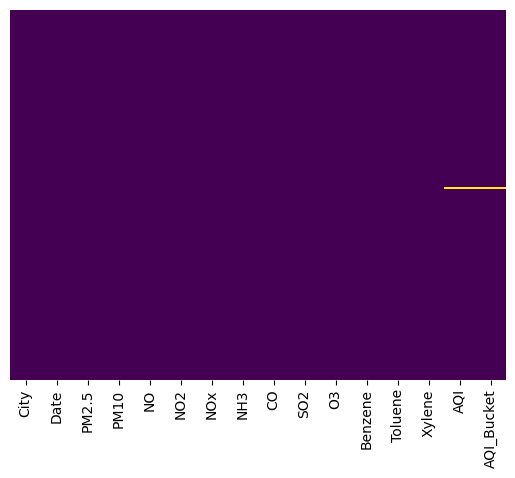

In [11]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
dataset.isnull().sum(axis=0)

City           0
Date           0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
Xylene         0
AQI           10
AQI_Bucket    10
dtype: int64

In [13]:
dataset.dropna(subset=['AQI'], inplace=True)
dataset.dropna(subset=['AQI_Bucket'], inplace=True)

C:\Users\rppon\AppData\Local\Temp\ipykernel_17004\1609348420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(subset=['AQI'], inplace=True)
C:\Users\rppon\AppData\Local\Temp\ipykernel_17004\1609348420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(subset=['AQI_Bucket'], inplace=True)


<Axes: >

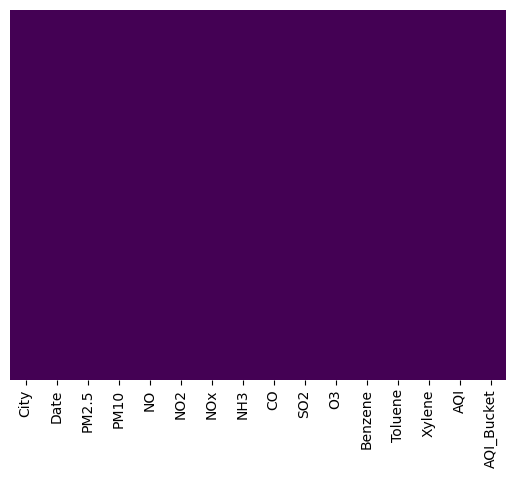

In [14]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

no null vlaues

In [15]:
dataset.isnull().sum(axis=0)

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

<Axes: >

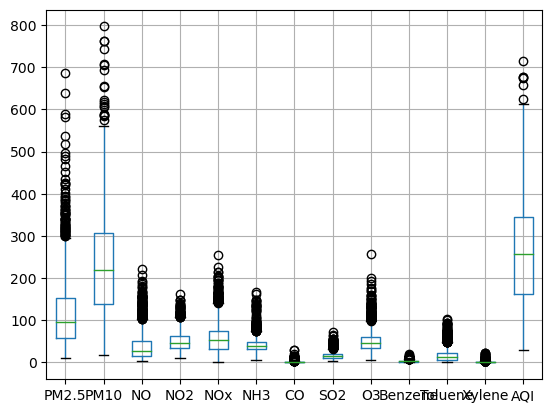

In [16]:
dataset.boxplot()

In [17]:
dataset.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [18]:
dataset.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [19]:
dataset.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,01-01-2015,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,02-01-2015,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,03-01-2015,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,04-01-2015,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,05-01-2015,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


In [20]:
dataset['AQI_Bucket'].unique()

array(['Severe', 'Moderate', 'Very Poor', 'Poor', 'Satisfactory', 'Good'],
      dtype=object)

In [21]:
category_mapping = {
    'Poor': 0,
    'Severe': 1,
    'Very Poor': 2,
    'Moderate': 3,
    'Satisfactory': 4,
    'Good': 5
}

# Map the values in the 'AQI_Bucket' column to integers
dataset['AQI_Bucket'] = dataset['AQI_Bucket'].map(category_mapping)

# Now, the 'AQI_Bucket' column contains integers
print(dataset)

        City        Date   PM2.5    PM10     NO    NO2     NOx     NH3     CO  \
10229  Delhi  01-01-2015  313.22  607.98  69.16  36.39  110.59   33.85  15.20   
10230  Delhi  02-01-2015  186.18  269.55  62.09  32.87   88.14   31.83   9.54   
10231  Delhi  03-01-2015   87.18  131.90  25.73  30.31   47.95   69.55  10.61   
10232  Delhi  04-01-2015  151.84  241.84  25.01  36.91   48.62  130.36  11.54   
10233  Delhi  05-01-2015  146.60  219.13  14.01  34.92   38.25  122.88   9.20   
...      ...         ...     ...     ...    ...    ...     ...     ...    ...   
12233  Delhi  27-06-2020   39.80  155.94  10.88  21.46   22.47   31.43   0.87   
12234  Delhi  28-06-2020   59.52  308.65  12.67  21.60   23.86   29.27   0.94   
12235  Delhi  29-06-2020   44.86  184.12  10.50  21.57   21.94   27.97   0.88   
12236  Delhi  30-06-2020   39.80   91.98   5.99  17.96   15.44   28.48   0.84   
12237  Delhi  01-07-2020   54.01  128.66   6.33  21.05   16.81   29.06   0.97   

         SO2     O3  Benzen

C:\Users\rppon\AppData\Local\Temp\ipykernel_17004\2016903017.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['AQI_Bucket'] = dataset['AQI_Bucket'].map(category_mapping)


In [22]:
dataset.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,01-01-2015,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,1
10230,Delhi,02-01-2015,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,1
10231,Delhi,03-01-2015,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,3
10232,Delhi,04-01-2015,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,2
10233,Delhi,05-01-2015,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,2


In [23]:
dataset.columns


Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [24]:
category_mapping = {
    'Delhi':0
}

# Map the values in the 'AQI_Bucket' column to integers
dataset['City'] = dataset['City'].map(category_mapping)

# Now, the 'AQI_Bucket' column contains integers
print(dataset)


       City        Date   PM2.5    PM10     NO    NO2     NOx     NH3     CO  \
10229     0  01-01-2015  313.22  607.98  69.16  36.39  110.59   33.85  15.20   
10230     0  02-01-2015  186.18  269.55  62.09  32.87   88.14   31.83   9.54   
10231     0  03-01-2015   87.18  131.90  25.73  30.31   47.95   69.55  10.61   
10232     0  04-01-2015  151.84  241.84  25.01  36.91   48.62  130.36  11.54   
10233     0  05-01-2015  146.60  219.13  14.01  34.92   38.25  122.88   9.20   
...     ...         ...     ...     ...    ...    ...     ...     ...    ...   
12233     0  27-06-2020   39.80  155.94  10.88  21.46   22.47   31.43   0.87   
12234     0  28-06-2020   59.52  308.65  12.67  21.60   23.86   29.27   0.94   
12235     0  29-06-2020   44.86  184.12  10.50  21.57   21.94   27.97   0.88   
12236     0  30-06-2020   39.80   91.98   5.99  17.96   15.44   28.48   0.84   
12237     0  01-07-2020   54.01  128.66   6.33  21.05   16.81   29.06   0.97   

         SO2     O3  Benzene  Toluene  

C:\Users\rppon\AppData\Local\Temp\ipykernel_17004\1510208447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['City'] = dataset['City'].map(category_mapping)


In [25]:
dataset["Date"] = pd.to_datetime(dataset["Date"], format="%d-%m-%Y")

# Extract the timestamp in seconds using a lambda function
dataset["Date"] = dataset["Date"].apply(lambda x: x.timestamp())

C:\Users\rppon\AppData\Local\Temp\ipykernel_17004\421340202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Date"] = pd.to_datetime(dataset["Date"], format="%d-%m-%Y")
C:\Users\rppon\AppData\Local\Temp\ipykernel_17004\421340202.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Date"] = dataset["Date"].apply(lambda x: x.timestamp())


In [26]:
dataset.dtypes

City            int64
Date          float64
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket      int64
dtype: object

In [27]:
dataset.head(15)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,0,1.420070e+09,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,1
10230,0,1.420157e+09,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,1
10231,0,1.420243e+09,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,3
10232,0,1.420330e+09,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,2
10233,0,1.420416e+09,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,2
10234,0,1.420502e+09,149.58,252.10,17.21,37.84,42.46,134.97,9.44,3.66,26.83,3.63,7.35,3.47,318.0,2
10235,0,1.420589e+09,217.87,376.51,26.99,40.15,52.41,134.82,9.78,5.82,28.96,4.93,9.42,5.21,353.0,2
10236,0,1.420675e+09,229.90,360.95,23.34,43.16,51.21,138.13,11.01,3.31,30.51,5.80,11.40,4.83,383.0,2
10237,0,1.420762e+09,201.66,397.43,19.18,38.56,45.60,140.60,11.09,3.48,32.94,5.25,11.12,5.26,375.0,2
10238,0,1.420848e+09,221.02,361.74,24.79,46.39,55.19,134.06,9.70,5.91,34.12,4.87,9.44,4.76,376.0,2


# Dimensionality Reduction

In [28]:
dataset.shape

(1999, 16)

# Principal component analysis

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with the actual file name)
df = dataset

# Extract features (X) and target variable (y)
X = df.drop(['AQI_Bucket', 'Date'], axis=1)
y = df['AQI_Bucket']

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# print(X_standardized==scaler.transform(X))
# Apply PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X_standardized)
X_train1, X_test1, y_train1, y_test1= train_test_split(X_pca, y, test_size=0.2, random_state=42)
X_pca.shape

(1999, 9)

In [53]:
X_pca

array([[ 5.15671349,  6.43542709,  0.34012677, ...,  1.34449769,
        -0.55967734,  0.15379361],
       [ 2.0339398 ,  3.75360184, -0.31935936, ...,  1.39764837,
        -0.83020823, -0.11726871],
       [-1.21558686,  3.65656634,  1.15565469, ...,  1.03167927,
         0.30399588,  0.3005557 ],
       ...,
       [-2.20571768,  0.32155932, -0.98540052, ...,  0.09338708,
         0.05642191, -0.05741821],
       [-3.16508027, -0.01190802, -0.57582882, ...,  0.02993358,
         0.37599051,  0.07697447],
       [-2.83242149,  0.18168876, -1.03546728, ...,  0.07939576,
         0.46032484,  0.12947985]])

In [54]:
pca.explained_variance_ratio_

array([0.46267235, 0.12767477, 0.09510799, 0.07697602, 0.06029963,
       0.04348572, 0.03883169, 0.03030789, 0.0176238 ])

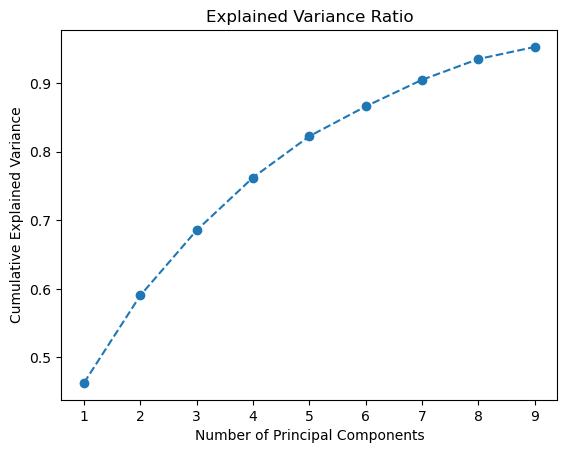

In [32]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot the explained variance ratio
plt.figure()
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

9 is where pca has 95% information

In [33]:
# Access the loadings (coefficients) of each original feature in each principal component
loadings = pca.components_
# Create a DataFrame for better visualization
loadings_df = pd.DataFrame(loadings, columns=X.columns)
# Display the loadings for each feature in each principal component
print("Loadings:")
print(loadings_df)

Loadings:
   City     PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
0  -0.0  0.358845  0.357040  0.342563  0.341551  0.289391  0.247116  0.083552   
1   0.0  0.044567 -0.042482 -0.110384 -0.212041  0.015657  0.208482  0.582318   
2  -0.0  0.023844  0.054047 -0.144348  0.104311 -0.036639  0.276480  0.343827   
3  -0.0 -0.264860 -0.209071 -0.062060  0.019559  0.459860 -0.391361  0.046294   
4  -0.0 -0.060874  0.063309  0.141594  0.117280 -0.375942 -0.220413  0.028953   
5   0.0 -0.352643 -0.365698  0.365572  0.323068  0.232507  0.467417  0.121936   
6  -0.0 -0.084409 -0.065435 -0.091074 -0.057973  0.064210 -0.325478  0.663379   
7   0.0 -0.020562 -0.076642 -0.307731 -0.189713 -0.418646  0.449176  0.012785   
8  -0.0 -0.083387  0.149752  0.369333  0.366279 -0.506958 -0.224048  0.244214   

        SO2        O3   Benzene   Toluene    Xylene       AQI  
0  0.214451  0.163146  0.337152  0.184406  0.088618  0.360301  
1 -0.421552 -0.293303  0.139440  0.165115  0.492064

contribution of each feature to the corresponding principal component

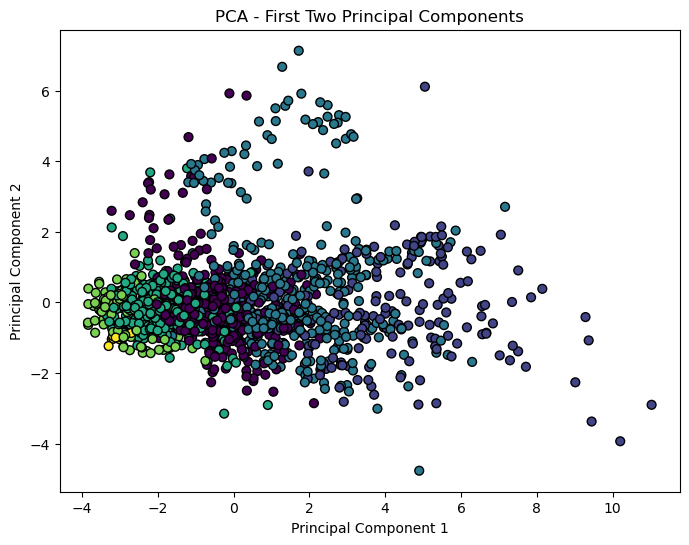

In [36]:
# Choose the number of components based on the plot or a desired explained variance threshold
# For example, let's say you want to retain 95% of the variance
n_components = (cumulative_explained_variance <= 0.95).sum() + 1

# Retrain PCA with the chosen number of components
pca = PCA(n_components=n_components)
# X_train = pca.fit_transform(X_train1)

# Visualize the first two principal components (for 2D data)
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train1, cmap='viridis', edgecolor='k', s=40)
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [39]:
(cumulative_explained_variance <= 0.95).sum()

8

In [40]:
X_train1[0]

array([-0.26881648, -0.34836305,  0.42008353,  0.8876624 , -0.57505168,
       -0.34935912, -0.26561247, -0.90854934, -0.11646178])

In [38]:
X_train[0]

array([-0.26271436, -0.4170681 ,  0.40801343,  0.99133212, -0.40079451,
       -0.26782584, -0.93290984, -0.03255203, -0.1210571 ])

 label not separated

In [43]:
unique_classes = np.unique(y_train1)
print("Unique Classes:", unique_classes)

Unique Classes: [0 1 2 3 4 5]


# LDA

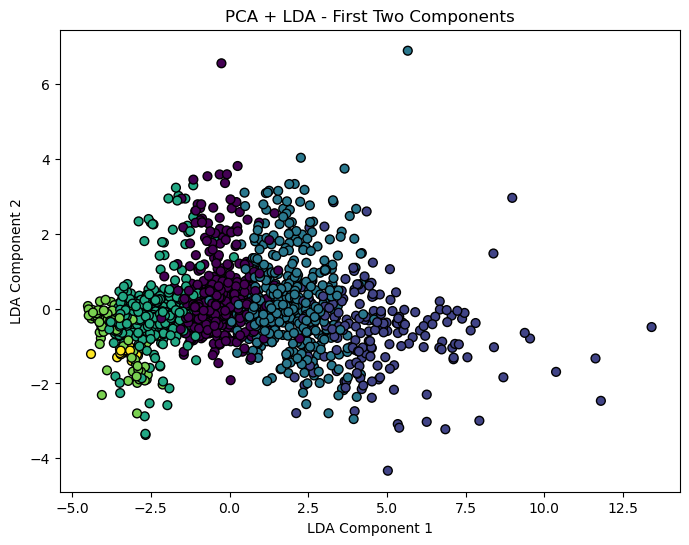

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Apply LDA on the PCA-transformed data
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train1, y_train1)
X_test_lda = lda.transform(X_test1)

# Visualize the first two principal components after LDA
plt.figure(figsize=(8, 6))
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train1, cmap='viridis', edgecolor='k', s=40)
plt.title('PCA + LDA - First Two Components')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.show()

In [47]:
X_train_lda

array([[-0.24144498, -0.51612109,  1.29150625,  0.32286605, -0.41443311],
       [-1.22325636,  0.71843118, -1.28079161,  0.61782925, -0.07529804],
       [ 1.44899453,  0.11689959,  0.13164712, -0.56744317, -0.77843138],
       ...,
       [ 0.34259421, -0.59826613,  0.20956776,  1.61815567,  0.82631196],
       [-0.77689184, -0.0444456 ,  0.23802278, -0.4667006 , -0.5672091 ],
       [-3.51936469,  0.56921017, -0.25756017,  0.11828307, -0.90052905]])

In [50]:
print(X_train_lda.shape[0] + X_test_lda.shape[0]) == X_train.shape[0] + X_test1.shape[0]

1999


False

In [51]:
X_train_lda.shape,X_test_lda.shape

((1599, 5), (400, 5))

no varition in label

# Probabilistic models

In [56]:
X_combined = pd.DataFrame(data=X_train_lda, columns=[f"LDA_{i+1}" for i in range(X_train_lda.shape[1])])

In [57]:
X1_combined = pd.DataFrame(data=X_test_lda, columns=[f"LDA_{i+1}" for i in range(X_test_lda.shape[1])])

In [58]:
X_combined

,LDA_1,LDA_2,LDA_3,LDA_4,LDA_5
0,0.241445,0.516121,1.291506,-0.322866,-0.414433
1,1.223256,-0.718431,-1.280792,-0.617829,-0.075298
2,-1.448995,-0.116900,0.131647,0.567443,-0.778431
3,-1.585550,-0.243196,0.356428,0.396407,0.795999
4,3.654728,-1.948275,-0.928012,0.138851,1.674690
...,...,...,...,...,...
1594,-1.427463,0.259577,0.348338,0.013352,-0.352950
1595,-4.132162,-0.361243,-0.243398,0.718583,-0.479408
1596,-0.342594,0.598266,0.209568,-1.618156,0.826312
1597,0.776892,0.044446,0.238023,0.466701,-0.567209


# Hidden Markovian model

In [ ]:
from hmmlearn import hmm
X = X_combined.values

# Define the Hidden Markov Model
n_components = 3  # You can adjust this based on your problem
hmm_model = hmm.GaussianHMM(n_components=n_components, covariance_type="full")

# Fit the model to the data
hmm_model.fit(X)

# Predict the hidden states
hidden_states = hmm_model.predict(X)

# Plot the results
plt.figure(figsize=(12, 6))
for i in range(n_components):
    mask = (hidden_states == i)
    plt.scatter(X[mask, 0], X[mask, 1], label=f'State {i + 1}')

plt.title('Hidden Markov Model')
plt.xlabel('LDA_1')
plt.ylabel('LDA_2')
plt.legend()
plt.show()

In [ ]:
aic = hmm_model.aic(X_combined)
bic = hmm_model.bic(X_combined)
print(f'AIC: {aic:.2f}, BIC: {bic:.2f}')

 AIC (Akaike Information Criterion) lower AIC values indicate better models
 BIC (Bayesian Information Criterion)  lower BIC values indicate better models

# hyperparameter tuning for hmm

In [ ]:
X = X_combined.values

# Define the range of parameters for the grid search
n_components_range = [2, 3, 4]  # You can adjust this based on your problem
covariance_types = ['full', 'tied', 'diag', 'spherical']

best_bic = np.inf
best_hmm = None

for n_components in n_components_range:
    for covariance_type in covariance_types:
        # Create an HMM with current parameters
        hmm_model = hmm.GaussianHMM(n_components=n_components, covariance_type=covariance_type)

        # Fit the model and compute BIC
        hmm_model.fit(X)
        bic = hmm_model.bic(X)

        # Check if current model has the best BIC so far
        if bic < best_bic:
            best_bic = bic
            best_hmm = hmm_model

# Use the best model found during the grid search
best_hidden_states = best_hmm.predict(X)

# Plot the results
plt.figure(figsize=(12, 6))
for i in range(best_hmm.n_components):
    mask = (best_hidden_states == i)
    plt.scatter(X[mask, 0], X[mask, 1], label=f'State {i + 1}')

plt.title('Hidden Markov Model (Best Parameters)')
plt.xlabel('LDA_1')
plt.ylabel('LDA_2')
plt.legend()
plt.show()

# Print the best parameters found
print("Best Parameters:")
print(f"n_components = {best_hmm.n_components}")
print(f"covariance_type = {best_hmm.covariance_type}")

In [ ]:
best_model.fit(X)

# Calculate AIC and BIC for the best model
aic = best_model.aic(X)
bic = best_model.bic(X)

print("AIC:", aic)
print("BIC:", bic)

# performance metrics for hmm

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming best_hidden_states contains predicted labels and y_true contains true labels
accuracy = accuracy_score(y_train, best_hidden_states)
precision = precision_score(y_train, best_hidden_states, average='weighted') # or 'macro', 'micro', etc.
recall = recall_score(y_train, best_hidden_states, average='weighted') # or 'macro', 'micro', etc.
f1 = f1_score(y_train, best_hidden_states, average='weighted') # or 'macro', 'micro', etc.

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


#error


closer to 1 good score

In [ ]:
from sklearn.metrics import silhouette_score

# Assuming best_hidden_states are the predicted states
silhouette_avg = silhouette_score(X, best_hidden_states)
print(f"Silhouette Score: {silhouette_avg}")


loss curve

In [ ]:
# Create log likelihood curve
log_likelihoods = []
for n_iter in range(1, 51):  # Train for a maximum of 50 iterations
    model = hmm.GaussianHMM(n_components=2, n_iter=n_iter, random_state=42)
    model.fit(X_train_lda )
    log_likelihoods.append(model.score(X_train_lda ))
# Plot log likelihood curve
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
plt.plot(range(1, 51), log_likelihoods, marker='o')
plt.xlabel('Number of iterations')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood Curve')
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
# Create log likelihood curve
log_likelihoods = []
for n_iter in range(1, 51):  # Train for a maximum of 50 iterations
    model = hmm.GaussianHMM(n_components=2, n_iter=n_iter, random_state=42)
    model.fit(X_test_lda )
    log_likelihoods.append(model.score(X_train_lda ))
# Plot log likelihood curve
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
plt.plot(range(1, 51), log_likelihoods, marker='o')
plt.xlabel('Number of iterations')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood Curve')
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


number iteration icreases the likelihood

# Unsupervised models

# K means clustering

In [ ]:
X_combined = X_combined.drop('HiddenState', axis=1)

In [ ]:
X_combined

,LDA_1,LDA_2,LDA_3,LDA_4,LDA_5
0,-0.241445,-0.516121,1.291506,-0.322866,0.414433
1,-1.223256,0.718431,-1.280792,-0.617829,0.075298
2,1.448995,0.116900,0.131647,0.567443,0.778431
3,1.585550,0.243196,0.356428,0.396407,-0.795999
4,-3.654728,1.948275,-0.928012,0.138851,-1.674690
...,...,...,...,...,...
1594,1.427463,-0.259577,0.348338,0.013352,0.352950
1595,4.132162,0.361243,-0.243398,0.718583,0.479408
1596,0.342594,-0.598266,0.209568,-1.618156,-0.826312
1597,-0.776892,-0.044446,0.238023,0.466701,0.567209


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


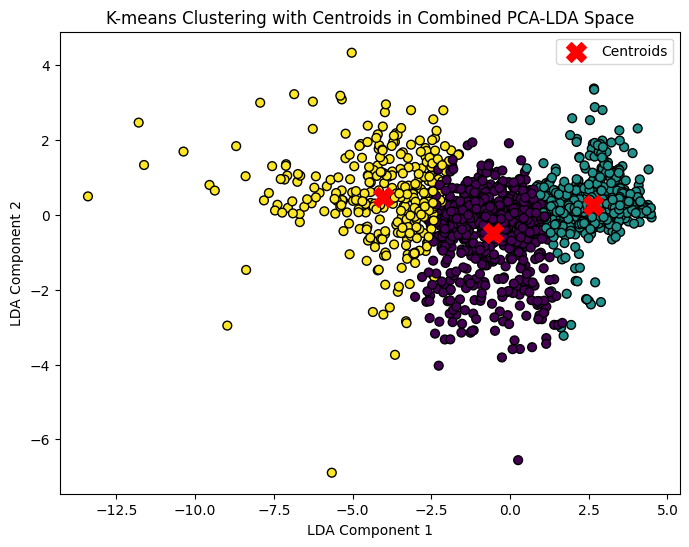

In [ ]:
from sklearn.cluster import KMeans
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(X_combined)

import matplotlib.pyplot as plt

# Assuming X_combined is a DataFrame containing columns 'LDA_1' and 'LDA_2'

plt.figure(figsize=(8, 6))
plt.scatter(X_combined['LDA_1'], X_combined['LDA_2'], c=kmeans.labels_, cmap='viridis', edgecolor='k', s=40)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering with Centroids in Combined PCA-LDA Space')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_combined, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.30


 a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1

0.30 suggests a moderately good clustering

In [ ]:
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(X_combined, kmeans.labels_)
print(f'Calinski-Harabasz Index: {ch_score:.2f}')

Calinski-Harabasz Index: 943.18


is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation

 it indicates that the clustering with the given number of clusters and the dataset features has produced clusters that are relatively well-separated and distinct.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

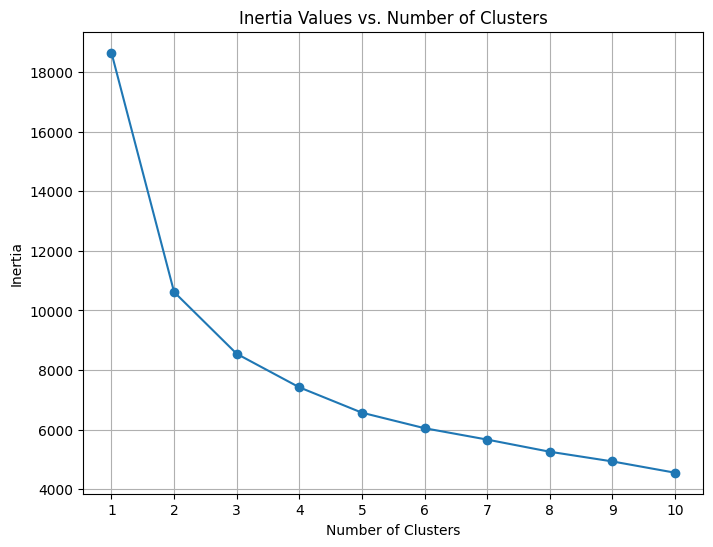

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Assuming X_combined is your dataset

inertia_values = []
cluster_range = range(1, 11)  # Try different numbers of clusters

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_combined)
    inertia_values.append(kmeans.inertia_)

# Plotting the inertia values
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Inertia Values vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


2 number of cluster good choice

 sum of squared distances between each data point and its closest centroid.



In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data (you can replace this with your own dataset)
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Initialize KMeans with a chosen number of clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Calculate inertia (within-cluster sum of squares)
inertia = kmeans.inertia_
print("Inertia:", inertia)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia: 212.00599621083484


Lower values of inertia generally indicate tighter, more compact clusters,

hyperparameter tuned

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


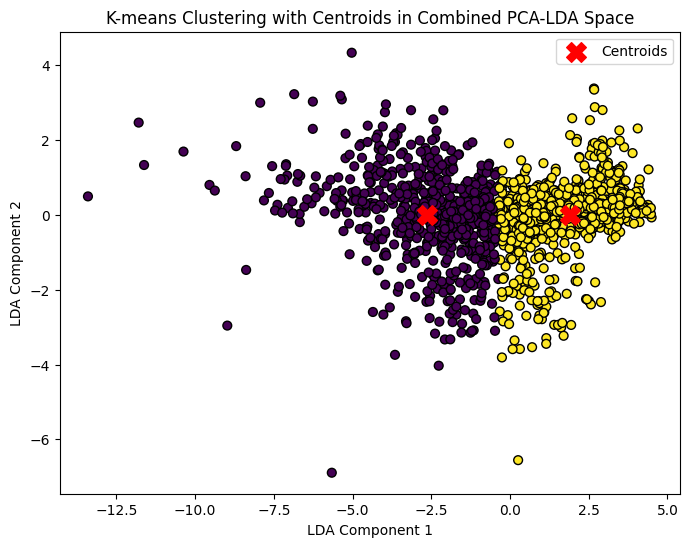

In [ ]:
from sklearn.cluster import KMeans
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(X_combined)

plt.figure(figsize=(8, 6))
plt.scatter(X_combined['LDA_1'], X_combined['LDA_2'], c=kmeans.labels_, cmap='viridis', edgecolor='k', s=40)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering with Centroids in Combined PCA-LDA Space')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

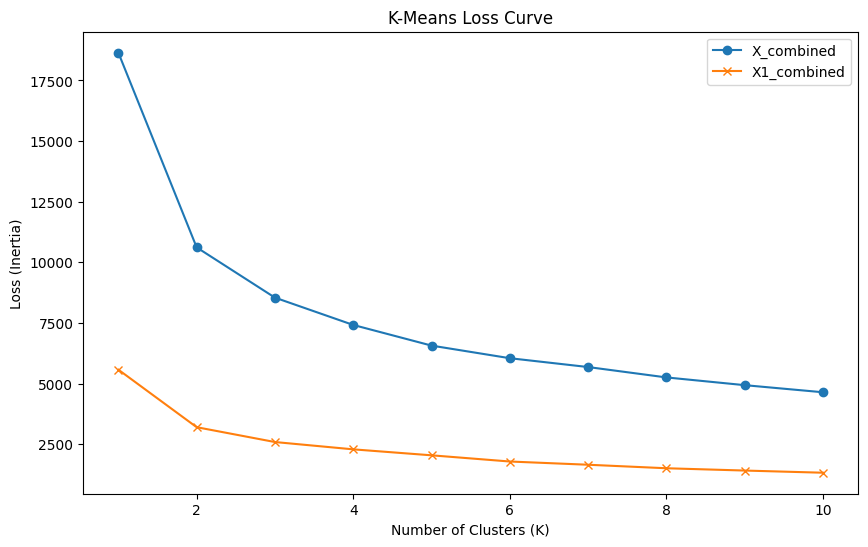

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X_combined and X1_combined are your datasets

# Calculate loss for different values of K for X_combined
loss_values_X_combined = []
for k in range(1, 11):  # Trying K from 1 to 10 clusters
    kmeans_X_combined = KMeans(n_clusters=k, random_state=42)
    kmeans_X_combined.fit(X_combined)
    loss_values_X_combined.append(kmeans_X_combined.inertia_)

# Calculate loss for different values of K for X1_combined
loss_values_X1_combined = []
for k in range(1, 11):  # Trying K from 1 to 10 clusters
    kmeans_X1_combined = KMeans(n_clusters=k, random_state=42)
    kmeans_X1_combined.fit(X1_combined)
    loss_values_X1_combined.append(kmeans_X1_combined.inertia_)

# Plotting the loss curve for X_combined and X1_combined
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), loss_values_X_combined, marker='o', label='X_combined')
plt.plot(range(1, 11), loss_values_X1_combined, marker='x', label='X1_combined')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Loss (Inertia)')
plt.title('K-Means Loss Curve')
plt.legend()
plt.show()


# Heirarchical clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

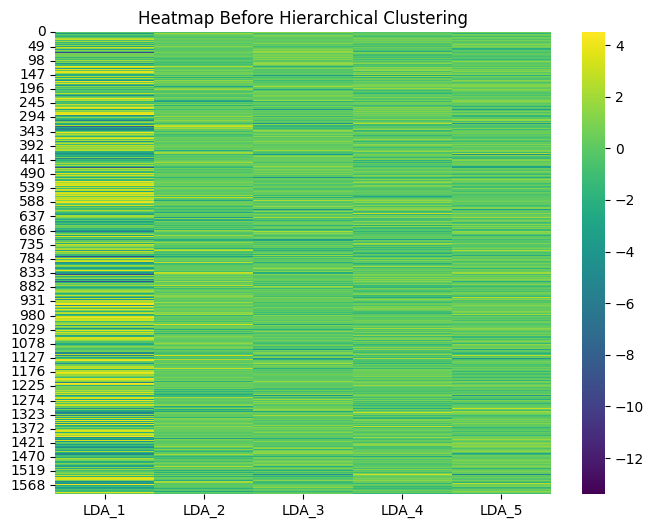

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(X_combined, cmap='viridis', cbar=True)
plt.title('Heatmap Before Hierarchical Clustering')
plt.show()

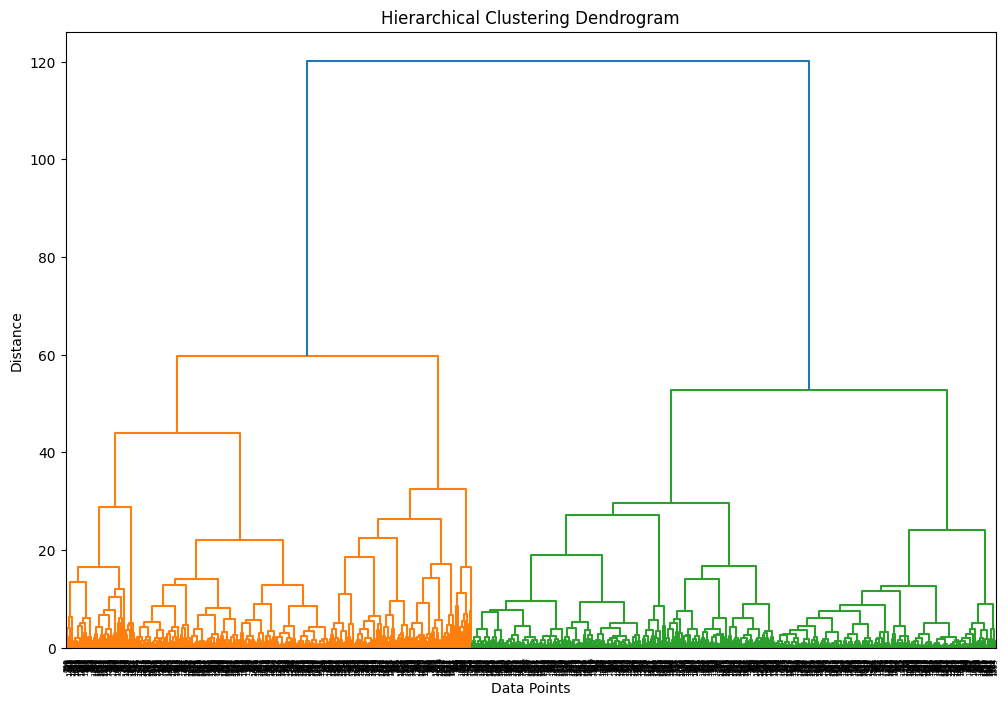

In [ ]:
# Perform hierarchical clustering
linked = linkage(X_combined, method='ward')  # You can choose other linkage methods as well

# Create a dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

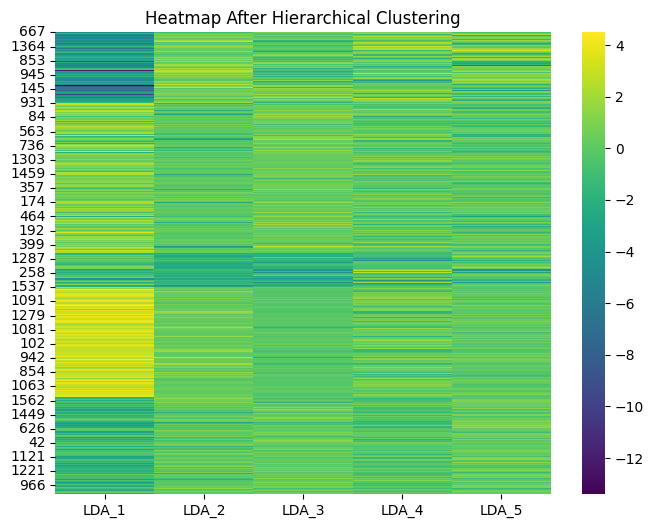

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Assuming X_combined is your data
# Perform hierarchical clustering
clusterer = AgglomerativeClustering(n_clusters=5)  # Define the number of clusters
cluster_labels = clusterer.fit_predict(X_combined)

# Reorder the data based on clustering results
sorted_indices = X_combined.index[np.argsort(cluster_labels)]
X_combined_clustered = X_combined.loc[sorted_indices]

# Create a heatmap after clustering
plt.figure(figsize=(8, 6))
sns.heatmap(X_combined_clustered, cmap='viridis', cbar=True)
plt.title('Heatmap After Hierarchical Clustering')
plt.show()


performance metrics and error

Text(0, 0.5, 'Score')

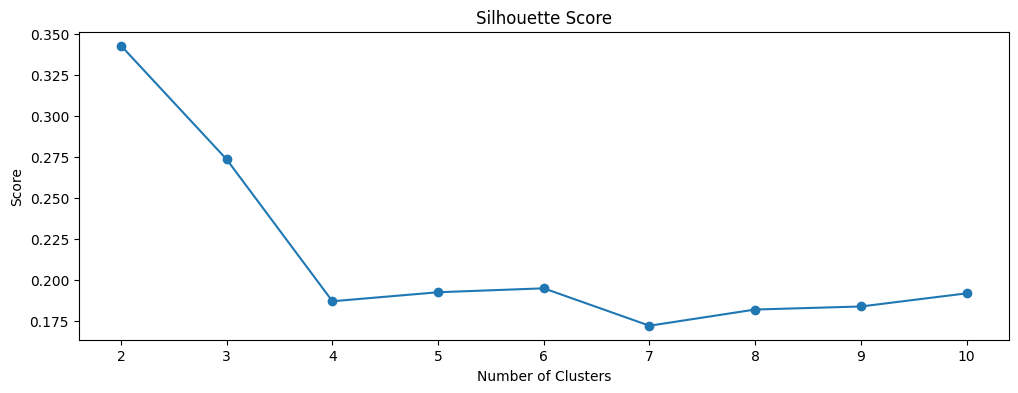

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

num_clusters_range = range(2, 11)  # Adjust the range based on your problem

# Initialize lists to store performance metrics
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Loop through different numbers of clusters
for num_clusters in num_clusters_range:
    hierarchical_clustering = AgglomerativeClustering(n_clusters=num_clusters)
    cluster_labels = hierarchical_clustering.fit_predict(X_combined)  # Assuming X_combined is your combined PCA-LDA data

    # Calculate performance metrics
    silhouette = silhouette_score(X_combined, cluster_labels)
    davies_bouldin = davies_bouldin_score(X_combined, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(X_combined, cluster_labels)

    # Append scores to lists
    silhouette_scores.append(silhouette)
    davies_bouldin_scores.append(davies_bouldin)
    calinski_harabasz_scores.append(calinski_harabasz)

# Plotting
plt.figure(figsize=(12, 4))

# Silhouette Score
# plt.subplot(1, 3, 1)
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

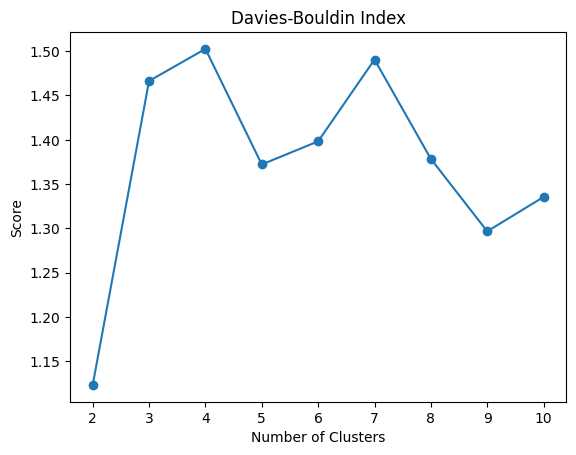

In [ ]:
# Davies-Bouldin Index
# plt.subplot(1, 3, 2)
plt.plot(num_clusters_range, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

A lower Davies-Bouldin Index indicates better clustering because it suggests that the clusters are more separated and distinct from each other.

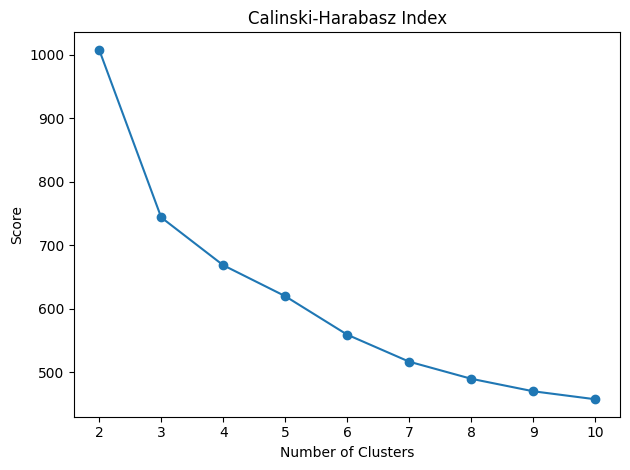

In [ ]:
# Calinski-Harabasz Index
# plt.subplot(1, 3, 3)
plt.plot(num_clusters_range, calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

A higher Calinski-Harabasz Index indicates better clustering because it suggests that the clusters are more separated and distinct from each other.

The Calinski–Harabasz index is characterized by the ratio of inter-cluster dispersion to intra-cluster dispersion for all clusters. The Davies–Bouldin index expresses the similarity between clusters.

2 is maxiumium

hyperparameter tuning hierarchical clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Assuming X is your data

best_score = -1  # Initialize best score
best_params = {}

for n_clusters in [2, 3, 4, 5]:  # Adjust the range of clusters
    for linkage in ['ward', 'complete', 'average', 'single']:  # Different linkage criteria
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        cluster_labels = model.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)

        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_params['n_clusters'] = n_clusters
            best_params['linkage'] = linkage

print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_score)


Best Parameters: {'n_clusters': 2, 'linkage': 'average'}
Best Silhouette Score: 0.6534458367579579


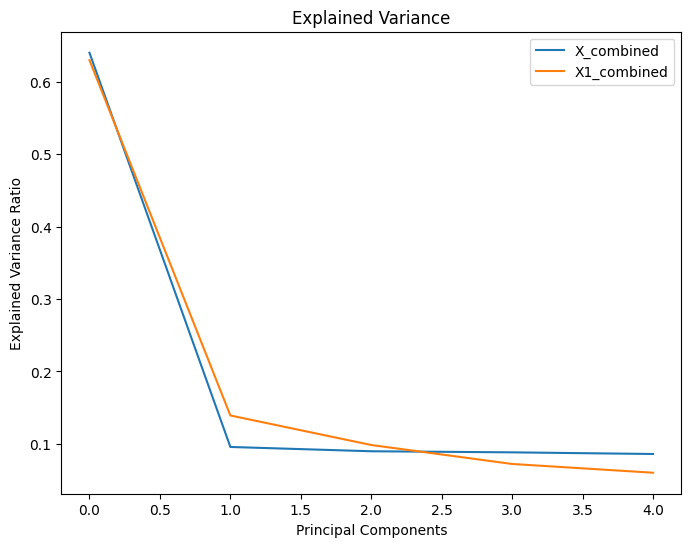

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X_combined and X1_combined are your data

# Perform PCA for X_combined
pca_combined = PCA()
pca_combined.fit(X_combined)
explained_var_combined = pca_combined.explained_variance_ratio_

# Perform PCA for X1_combined
pca1_combined = PCA()
pca1_combined.fit(X1_combined)
explained_var1_combined = pca1_combined.explained_variance_ratio_

# Plotting the explained variance for both datasets
plt.figure(figsize=(8, 6))
plt.plot(explained_var_combined, label='X_combined')
plt.plot(explained_var1_combined, label='X1_combined')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance')
plt.legend()
plt.show()


# Ensemble model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize a weak classifier - Decision Tree is commonly used
base_classifier = DecisionTreeClassifier(max_depth=1)

# Initialize AdaBoost classifier
ada_boost_classifier = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, learning_rate=1.0)

# Train the AdaBoost classifier
ada_boost_classifier.fit(X_train1, y_train1)

# Make predictions on the test set
predictions = ada_boost_classifier.predict(X_test1)

# Evaluate accuracy
accuracy = accuracy_score(y_test1, predictions)
print(f"Accuracy of AdaBoost Classifier: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy of AdaBoost Classifier: 0.475


perform metrics and error

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Precision: 0.3516438934318121
Recall: 0.475
F1 Score: 0.3333500221487365
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       115
           1       1.00      0.14      0.25        50
           2       0.49      0.90      0.63        92
           3       0.45      0.98      0.62       102
           4       0.00      0.00      0.00        35
           5       0.00      0.00      0.00         6

    accuracy                           0.48       400
   macro avg       0.32      0.34      0.25       400
weighted avg       0.35      0.47      0.33       400



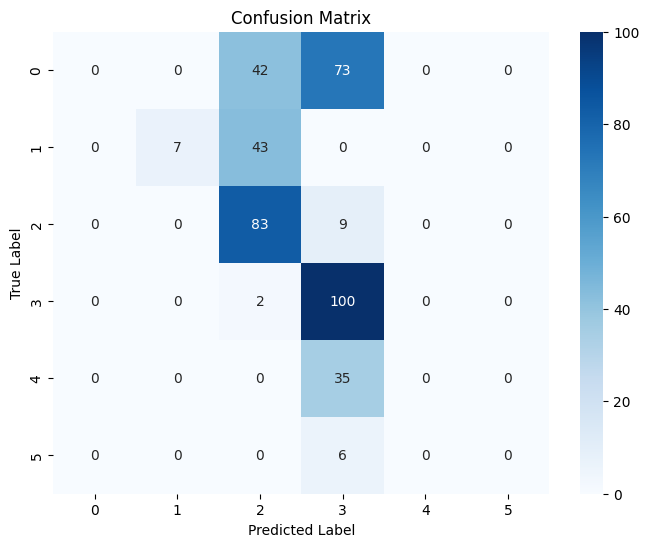

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# Calculate precision
precision = precision_score(y_test1, predictions, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test1, predictions, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test1, predictions, average='weighted')
print("F1 Score:", f1)

# Classification report
class_report = classification_report(y_test1, predictions)
print("Classification Report:")
print(class_report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test1, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the base classifier
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create AdaBoost classifier
ada_boost_classifier = AdaBoostClassifier(base_estimator=base_classifier)

# Define the grid of parameters to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Adjust the number of estimators
    'learning_rate': [0.1, 0.5, 1.0]  # Adjust the learning rate
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=ada_boost_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train1, y_train1)

# Get the best parameters found by Grid Search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train a new AdaBoost classifier using the best parameters
best_ada_boost_classifier = AdaBoostClassifier(base_estimator=base_classifier,
                                               n_estimators=best_params['n_estimators'],
                                               learning_rate=best_params['learning_rate'])

best_ada_boost_classifier.fit(X_train1, y_train1)

# Make predictions on the test set
y_pred_best_adaboost = best_ada_boost_classifier.predict(X_test1)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Best Parameters: {'learning_rate': 0.5, 'n_estimators': 150}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Precision: 0.6023136970461578
Recall: 0.5675
F1 Score: 0.5292947707537387
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.46      0.55       115
           1       0.67      0.04      0.08        50
           2       0.46      0.82      0.59        92
           3       0.68      0.65      0.66       102
           4       0.53      0.89      0.67        35
           5       0.00      0.00      0.00         6

    accuracy                           0.57       400
   macro avg       0.50      0.47      0.42       400
weighted avg       0.60      0.57      0.53       400



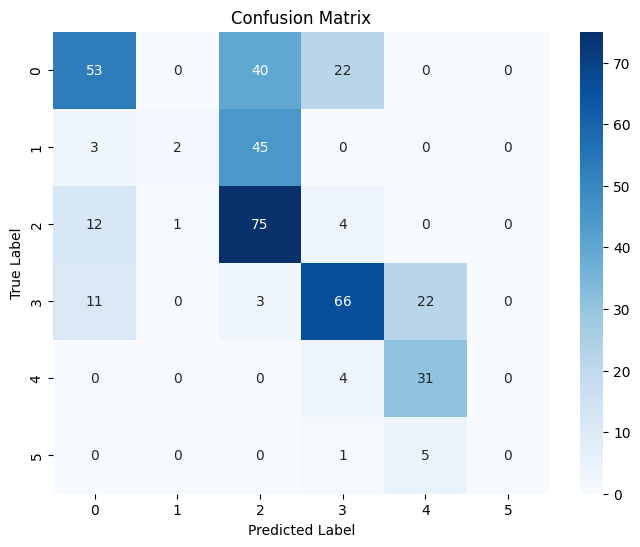

In [ ]:
# Calculate precision
precision = precision_score(y_test1, y_pred_best_adaboost, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test1, y_pred_best_adaboost, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test1, y_pred_best_adaboost, average='weighted')
print("F1 Score:", f1)

# Classification report
class_report = classification_report(y_test1, y_pred_best_adaboost)
print("Classification Report:")
print(class_report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test1, y_pred_best_adaboost)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

loss curve

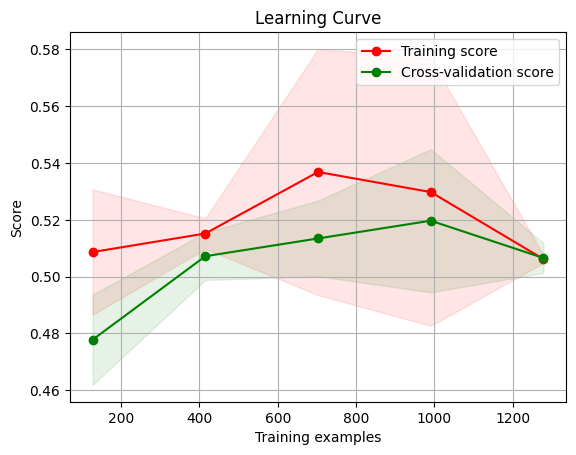

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Define your AdaBoost classifier
base_classifier = DecisionTreeClassifier(max_depth=1)
ada_boost_classifier = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, learning_rate=1.0)

# Plot learning curve
plot_learning_curve(ada_boost_classifier, "Learning Curve", X_train1, y_train1, cv=5)
plt.show()
